In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
import statsmodels.api as sm

In [4]:
data=pd.read_csv("Downloads/TS DV Lab Datasets/AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)


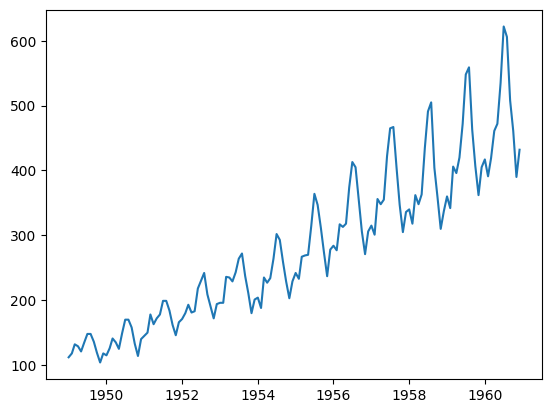

In [7]:
plt.plot(figsize=(12,6))
plt.plot(data.index,data['#Passengers'],label='original')
plt.show()

In [11]:
model_ll=UnobservedComponents(data['#Passengers'], 'llevel')
res_ll=model_ll.fit()
print(res_ll.summary())

model_lt=UnobservedComponents(data['#Passengers'],'lltrend')
res_lt=model_lt.fit()
print(res_lt.summary())

model_seas=UnobservedComponents(data['#Passengers'], 'llevel',seasonal=12)
res_seas = model_seas.fit()
print(res_seas.summary())

model_trig = UnobservedComponents(data['#Passengers'], 'lltrend', seasonal=12, 
                                stochastic_seasonal=True)
res_trig = model_trig.fit()
print(res_trig.summary())

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                        Unobserved Components Results                         
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                    local level   Log Likelihood                -705.955
Date:                Tue, 06 May 2025   AIC                           1415.909
Time:                        10:16:56   BIC                           1421.835
Sample:                    01-01-1949   HQIC                          1418.317
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.311e-07     85.482   1.53e-09      1.000    -167.542     167.542
sigma2.level      1136.4043    176.695      6.431      0.000     790.088    1482.721
Ljung-Box (L1) (Q):         

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                            Unobserved Components Results                            
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                    local linear trend   Log Likelihood                -566.051
                   + stochastic seasonal(12)   AIC                           1140.103
Date:                       Tue, 06 May 2025   BIC                           1151.603
Time:                               10:16:57   HQIC                          1144.776
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2.504e-08     19.504   1.28e-09      1

<Figure size 1200x1200 with 0 Axes>

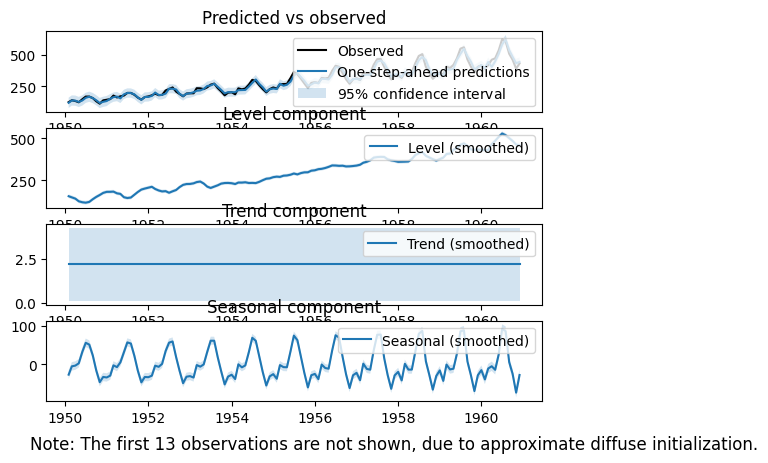

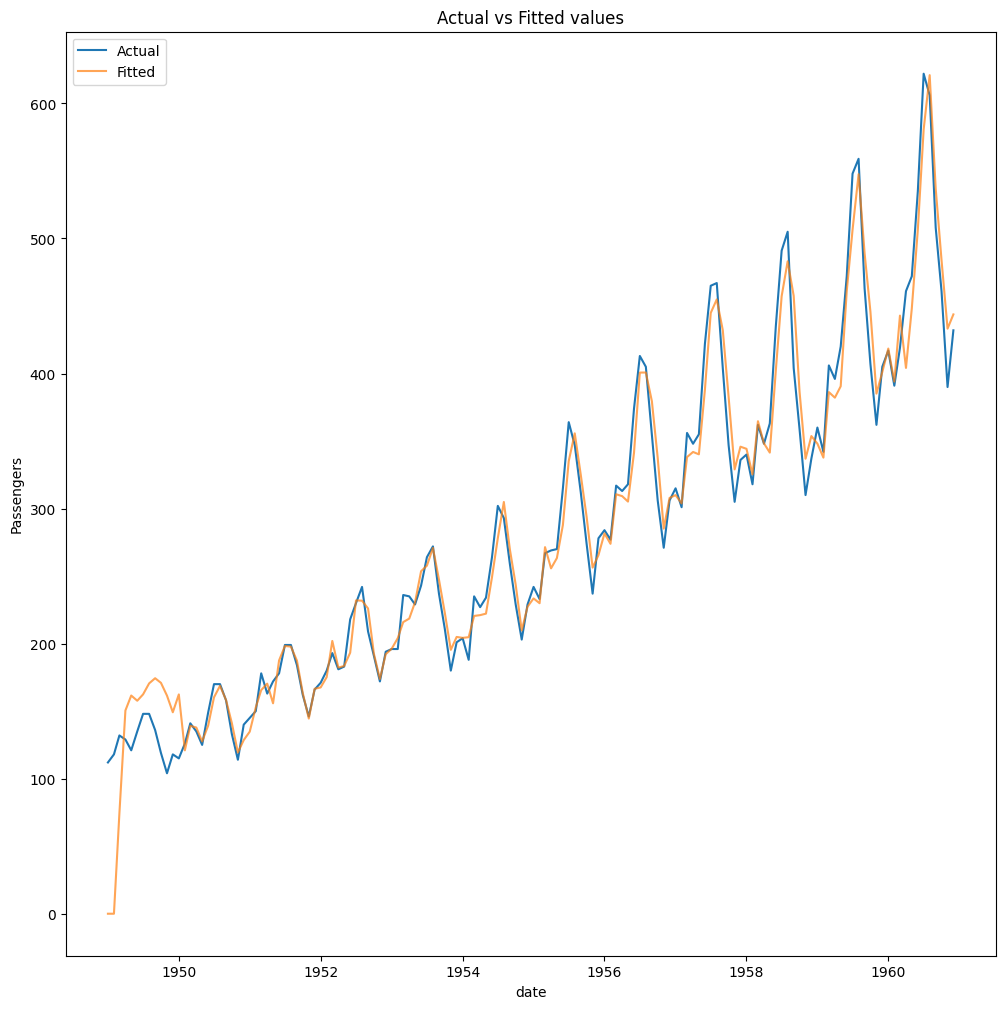

In [14]:
plt.figure(figsize=(12,12))
res_trig.plot_components()
plt.show()

plt.figure(figsize=(12,12))
plt.plot(data.index, data['#Passengers'], label='Actual')
plt.plot(data.index,res_trig.fittedvalues, label='Fitted', alpha=0.7)
plt.title('Actual vs Fitted values')
plt.xlabel('date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

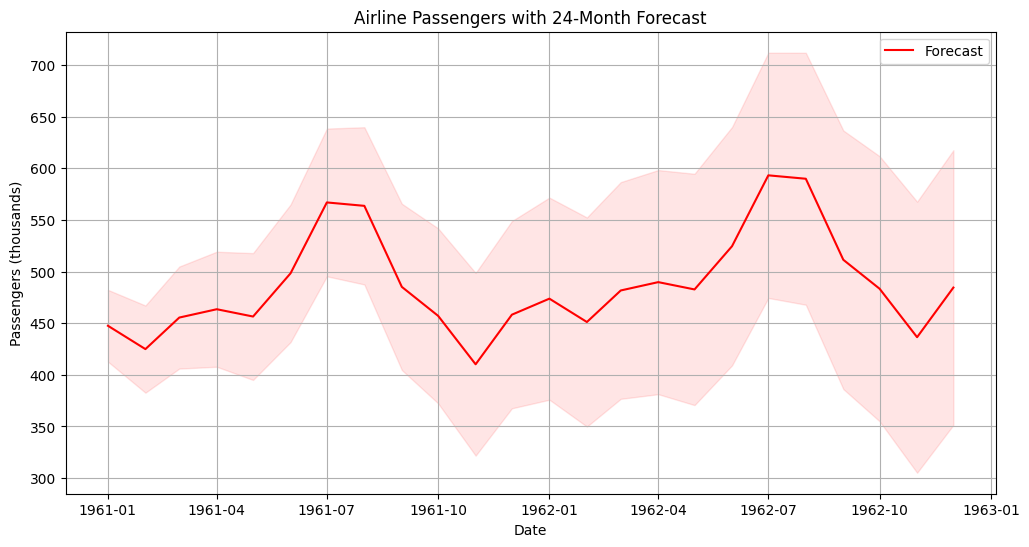

In [26]:
forecast=res_trig.get_forecast(steps=24)


plt.figure(figsize=(12, 6))
plt.plot(forecast.conf_int().index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast.conf_int().index, 
                 forecast.conf_int().iloc[:,0], 
                 forecast.conf_int().iloc[:,1],
                 color='red', alpha=0.1)
plt.title('Airline Passengers with 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()